In [1]:
import json
import os
import sys
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%load_ext autoreload

%autoreload 2


In [2]:
import end_to_end_profiles as e2e
import profiler
import single_model_profiles as sm_profs

In [3]:
pipeline_three_df = profiler.load_pipeline_three_systemx()

No profile found for alexnet: 1 gpus, 1 cpus, batch size 30. Approximating with batch size 35.057500000000005
No profile found for res50: 1 gpus, 1 cpus, batch size 30. Approximating with batch size 27.67075517075517
No profile found for res152: 1 gpus, 1 cpus, batch size 30. Approximating with batch size 15.964786324786324
No profile found for alexnet: 1 gpus, 1 cpus, batch size 30. Approximating with batch size 35.057500000000005
No profile found for res50: 1 gpus, 1 cpus, batch size 30. Approximating with batch size 27.67075517075517
No profile found for res152: 1 gpus, 1 cpus, batch size 30. Approximating with batch size 15.964786324786324
No profile found for alexnet: 1 gpus, 1 cpus, batch size 30. Approximating with batch size 35.057500000000005
No profile found for res50: 1 gpus, 1 cpus, batch size 30. Approximating with batch size 27.67075517075517
No profile found for res152: 1 gpus, 1 cpus, batch size 30. Approximating with batch size 15.964786324786324
No profile found for a

In [ ]:
pipeline_one_df = profiler.load_pipeline_one_systemx()

In [4]:
def plot_pipeline_exp(pipeline):
    plt.clf()
    fig, (ax_thru, ax_lat) = plt.subplots(ncols=2, nrows=1)
    fig.set_size_inches(12,8)
    colors = sns.color_palette(n_colors=8)
    i = 0
    for title, group in pipeline.groupby("name"):
        box = ax_lat.boxplot(x=group["latency"], labels=group["cost"], patch_artist=True)
        for patch in box["boxes"]:
            patch.set_facecolor(colors[i])
        lat = group["estimated_latency"].iloc[0]
        cost_xs = np.arange(0.0, max(pipeline["cost"]) + 0.8, 0.1)
        lat_ys = lat * np.ones(len(cost_xs))
        ax_lat.plot(cost_xs, lat_ys, '--', linewidth=2, color=colors[i])
        ax_thru.scatter(x=group["cost"], y=group["mean_throughput"], c=colors[i], marker="o", label=title)
        ax_thru.scatter(x=group["cost"], y=group["estimated_thru"], c=colors[i], marker="^", label="")

        i += 1
    ax_lat.set_ylabel("Latency (s)")
    ax_lat.set_xlim((0,max(pipeline["cost"]) + 0.8))
    ax_thru.set_xlim((0,max(pipeline["cost"]) + 0.8))

    ax_lat.set_xlabel("Cost ($/hr)")
    ax_thru.set_ylabel("Throughput (queries/s)")
    ax_thru.set_xlabel("Cost ($/hr)")
    ax_thru.legend(loc=2)


    plt.show()

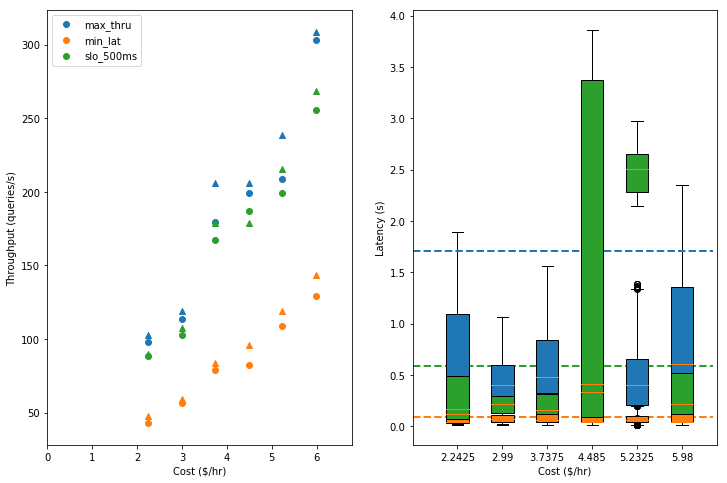

In [5]:
plot_pipeline_exp(pipeline_three_df)

In [ ]:
pipeline_one_df

In [ ]:
pipeline_three_df

In [6]:
single_model_profs = sm_profs.load_single_model_profiles()

In [10]:

single_model_profs["res50"].sort_values("mean_throughput_qps")

,num_gpus_per_replica,num_cpus_per_replica,mean_throughput_qps,std_throughput_qps,p99_latency_ms,mean_batch_size,inst_type,cost
0,1,1,48.736332,0.007177,0.023672,1.000000,p2.8xlarge,0.7475
1,1,1,63.906978,0.072859,0.054513,1.942890,p2.8xlarge,0.7475
2,1,1,76.285877,0.253129,0.094527,3.456438,p2.8xlarge,0.7475
3,1,1,83.097698,0.463909,0.134817,5.392449,p2.8xlarge,0.7475
4,1,1,84.531604,0.249402,0.134376,5.694769,p2.8xlarge,0.7475
5,1,1,88.120840,0.561545,0.219117,9.541231,p2.8xlarge,0.7475
6,1,1,90.513584,0.839520,0.237580,10.748134,p2.8xlarge,0.7475
8,1,1,92.258160,0.475947,0.415486,19.100529,p2.8xlarge,0.7475
7,1,1,94.114751,1.538247,0.328836,15.173631,p2.8xlarge,0.7475
9,1,1,96.304349,1.666865,0.577564,27.670755,p2.8xlarge,0.7475


In [ ]:
pipeline_three_df

In [ ]:
pipeline_three_df["cost"].iloc[0]

In [ ]:
max(pipeline_three_df["cost"])

In [ ]:
np.linspace(0.0, 5.4, 50)